This study analyzes chronic kidney disease using machine learning techniques based on a chronic kidney disease (CKD).

Chronic Kidney Disease (CKD) or chronic renal disease has become a major issue with a steady growth rate. A person can only survive without kidneys for an average time of 18 days, which makes a huge demand for a kidney transplant and Dialysis.
It is important to have effective methods for early prediction of CKD. Machine learning methods are effective in CKD prediction. This work proposes a workflow to predict CKD status based on clinical data, incorporating data prepossessing, a missing value handling method with collaborative filtering and attributes selection

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


jupyter nbextension install --py luxwidget
jupyter nbextension enable --py luxwidget
pip install lux-api

In [167]:
# import necessary packages

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
#import lux # EDA
from sklearn.preprocessing import MinMaxScaler

In [168]:
# import the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/DL/Kidney Disease Health Care/kidney_disease.csv')
df.head(n=10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [169]:
df.shape

(400, 26)

In [170]:
# Total count of null values
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [171]:
# Total Null count in percentage
df.isnull().sum() / len(df) *100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## Handling missing values using SimpleImputer

In [173]:
# sklearn approach to handle all missing data at one go

from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_imputed = pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns = df.columns
df_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# Imputed columns

In [174]:
df_imputed.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [175]:
# After handling missing data, there is no null values
df_imputed.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [176]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              400 non-null    object
 1   age             400 non-null    object
 2   bp              400 non-null    object
 3   sg              400 non-null    object
 4   al              400 non-null    object
 5   su              400 non-null    object
 6   rbc             400 non-null    object
 7   pc              400 non-null    object
 8   pcc             400 non-null    object
 9   ba              400 non-null    object
 10  bgr             400 non-null    object
 11  bu              400 non-null    object
 12  sc              400 non-null    object
 13  sod             400 non-null    object
 14  pot             400 non-null    object
 15  hemo            400 non-null    object
 16  pcv             400 non-null    object
 17  wc              400 non-null    object
 18  rc        

In [177]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Unique values in each columns

In [178]:
# Finding the unique values in the columns

for i in df_imputed.columns:
    print("************************************",i,"**********************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

************************************ id **********************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 

Abbreviations:
==============

pcv - nwq

wc - nwq

rc - num with quot

dm- char

cad - char

classification - char

In [241]:
print(df_imputed['pcv'].mode())
print(df_imputed['wc'].mode())
print(df_imputed['rc'].mode())

0    41.0
Name: pcv, dtype: float64
0    9800.0
Name: wc, dtype: float64
0    5.2
Name: rc, dtype: float64


In [180]:
df_imputed['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [181]:
df_imputed['classification'] = df_imputed['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)

In [182]:
df_imputed['cad'].value_counts()

no      364
yes      34
\tno      2
Name: cad, dtype: int64

In [183]:
df_imputed['cad'] = df_imputed['cad'].apply(lambda x:'no' if x=='\tno' else x)

In [184]:
df_imputed['dm'].value_counts()

no       260
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [185]:
df_imputed['dm'] = df_imputed['dm'].apply(lambda x:'no' if x=='\tno' else x)
df_imputed['dm'] = df_imputed['dm'].apply(lambda x:'yes' if x=='\tyes' else x)
df_imputed['dm'] = df_imputed['dm'].apply(lambda x:'yes' if x==' yes' else x)

In [186]:
df_imputed['dm'].value_counts()

#PCV = Packed Cell Volume


no     263
yes    137
Name: dm, dtype: int64

Abbreviation
============
pcv - nwq

wc - nwq

rc - num with quot

dm- char

cad - char

classification - char

In [187]:
df_imputed['rc'].value_counts()

5.2    148
4.5     16
4.9     14
4.7     11
4.8     10
3.9     10
4.6      9
3.4      9
5.9      8
5.5      8
6.1      8
5.0      8
3.7      8
5.3      7
5.8      7
5.4      7
3.8      7
5.6      6
4.3      6
4.2      6
3.2      5
4.4      5
5.7      5
6.4      5
5.1      5
6.2      5
6.5      5
4.1      5
3.6      4
6.3      4
6.0      4
4.0      3
3.3      3
4        3
3.5      3
2.9      2
3.1      2
2.6      2
2.1      2
2.5      2
2.8      2
3.0      2
2.7      2
5        2
2.3      1
\t?      1
2.4      1
3        1
8.0      1
Name: rc, dtype: int64

In [188]:
df_imputed['rc'] = df_imputed['rc'].apply(lambda x:'5.2' if x=='\t?' else x)

In [189]:
df_imputed['wc'].value_counts()

9800     116
6700      10
9600       9
7200       9
9200       9
        ... 
19100      1
\t?        1
12300      1
14900      1
12700      1
Name: wc, Length: 92, dtype: int64

'\t?'
'\t6200'
'\t8400'

9800

In [190]:
df_imputed['wc'] = df_imputed['wc'].apply(lambda x:'9800' if x=='\t?' else x)
df_imputed['wc'] = df_imputed['wc'].apply(lambda x:'6200' if x=='\t6200' else x)
df_imputed['wc'] = df_imputed['wc'].apply(lambda x:'8400' if x=='\t8400' else x)

In [191]:
df_imputed['pcv'].value_counts()

41      91
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
22       3
27       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
\t?      1
16       1
14       1
Name: pcv, dtype: int64

In [192]:
df_imputed['pcv'] = df_imputed['pcv'].apply(lambda x:'43' if x=='\t43' else x)
df_imputed['pcv'] = df_imputed['pcv'].apply(lambda x:'41' if x=='\t?' else x)

In [193]:
for i in df_imputed.columns:
    print("************************************",i,"**********************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

************************************ id **********************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 

# Chronic Kidney Disease Vs Non Chronic Kidney Disease

Axes(0.125,0.11;0.775x0.77)


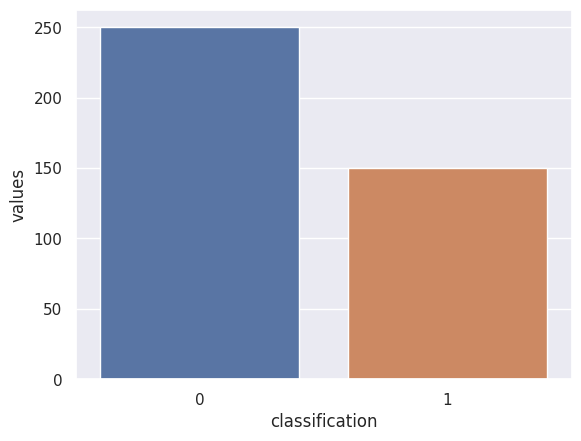

In [244]:

temp = df_imputed['classification'].value_counts()
temp_df = pd.DataFrame({'classification': temp.index, 'values': temp.values})
print(sns.barplot(x = 'classification', y='values', data=temp_df))

In [195]:
df_imputed['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [196]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              400 non-null    object
 1   age             400 non-null    object
 2   bp              400 non-null    object
 3   sg              400 non-null    object
 4   al              400 non-null    object
 5   su              400 non-null    object
 6   rbc             400 non-null    object
 7   pc              400 non-null    object
 8   pcc             400 non-null    object
 9   ba              400 non-null    object
 10  bgr             400 non-null    object
 11  bu              400 non-null    object
 12  sc              400 non-null    object
 13  sod             400 non-null    object
 14  pot             400 non-null    object
 15  hemo            400 non-null    object
 16  pcv             400 non-null    object
 17  wc              400 non-null    object
 18  rc        

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [198]:
df.select_dtypes(exclude=["object"]).columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')

In [199]:
for i in df.select_dtypes(exclude=["object"]).columns :
    df_imputed[i] = df_imputed[i].apply(lambda x:float(x))

In [200]:
df_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

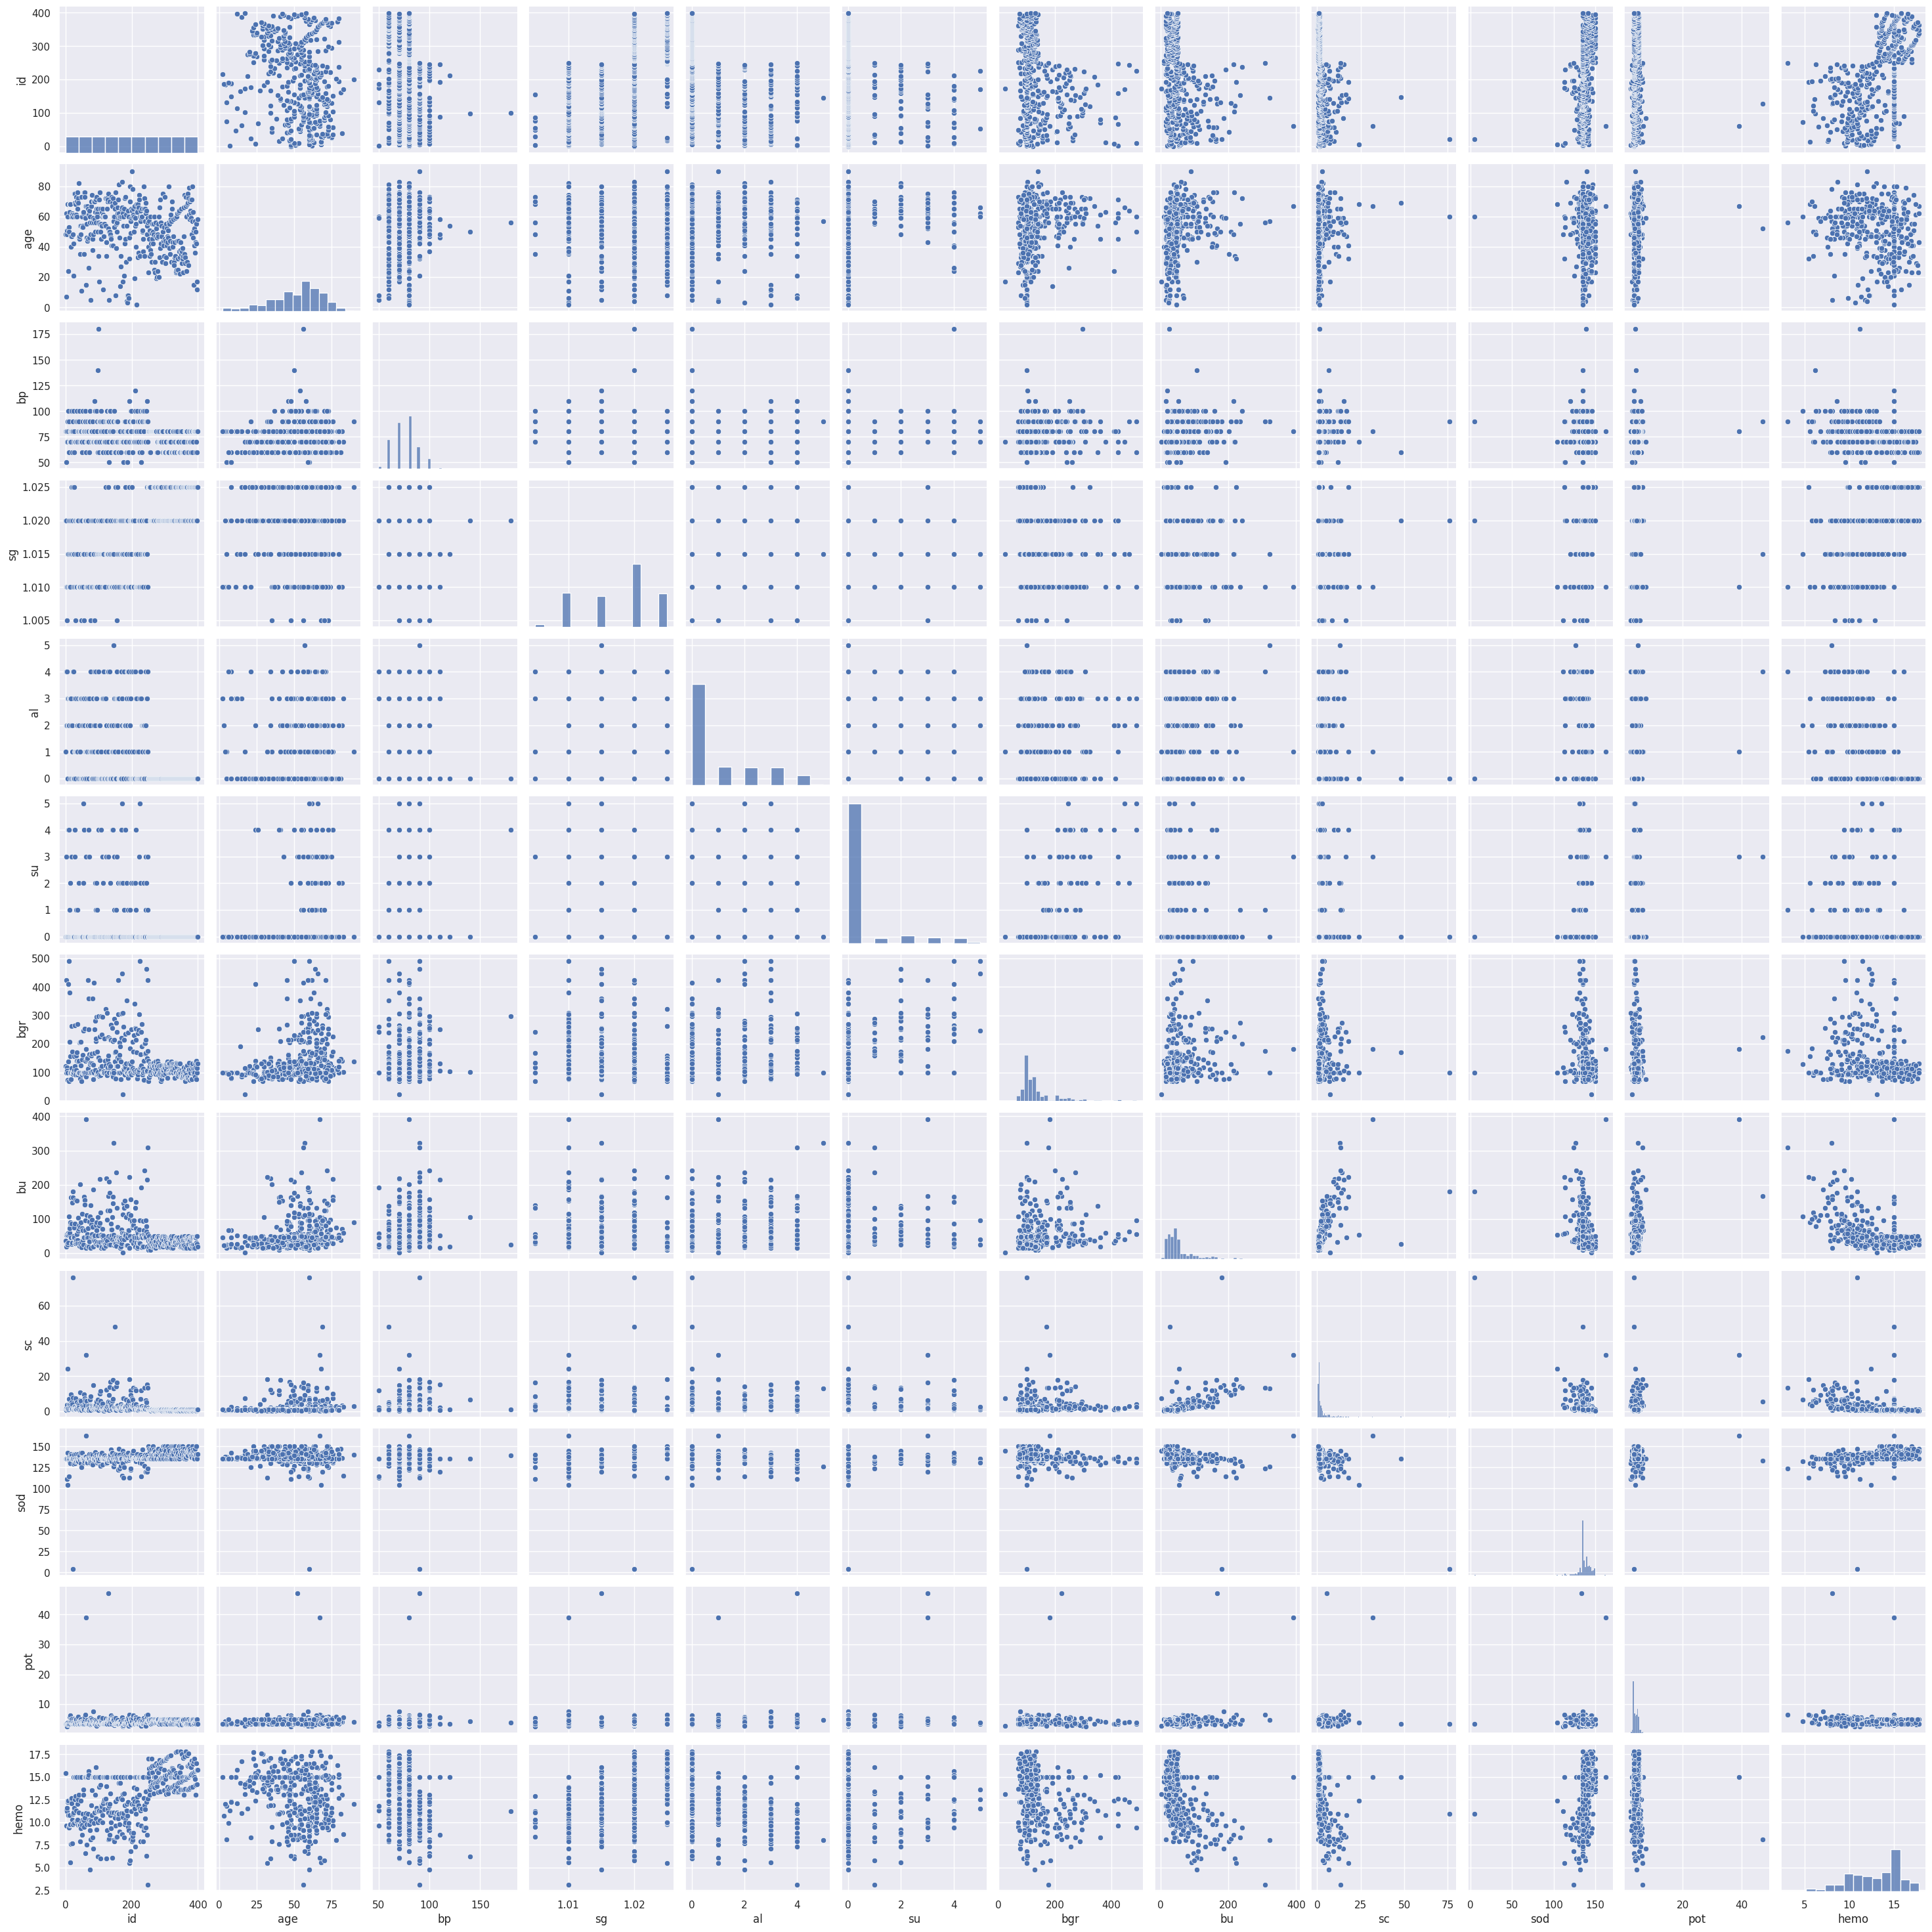

In [201]:
sns.pairplot(df_imputed)

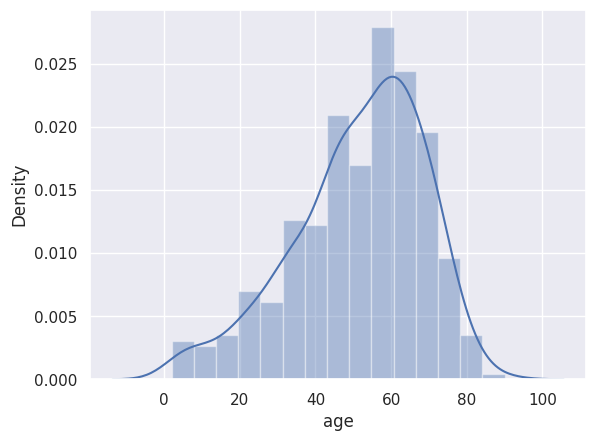

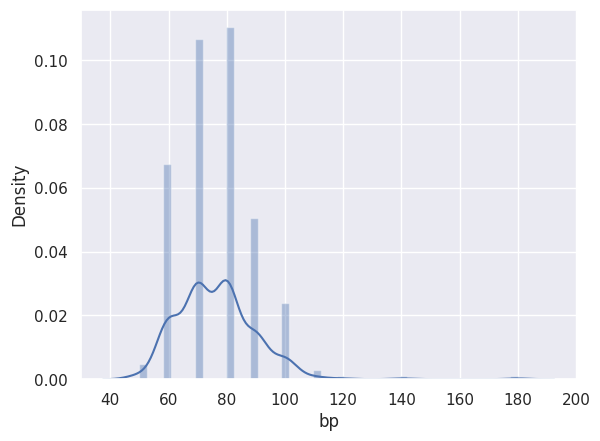

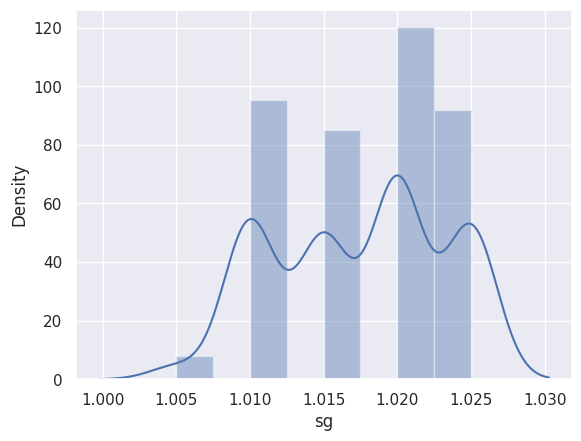

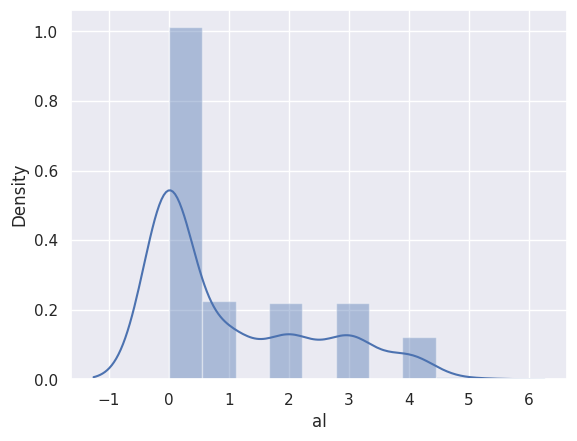

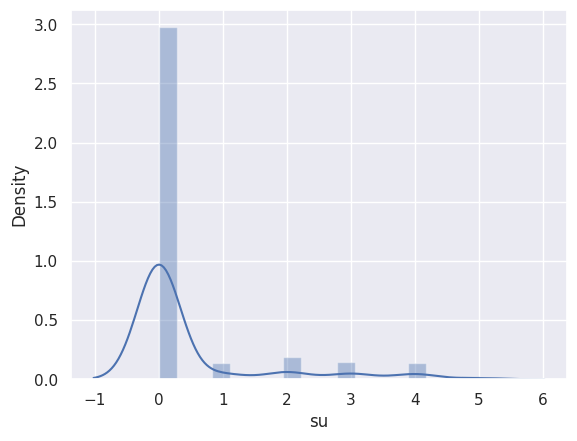

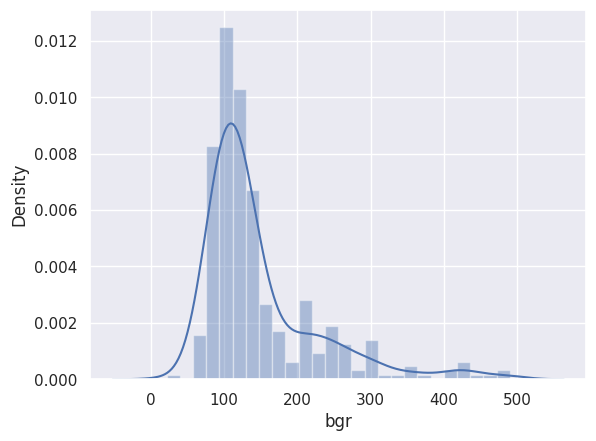

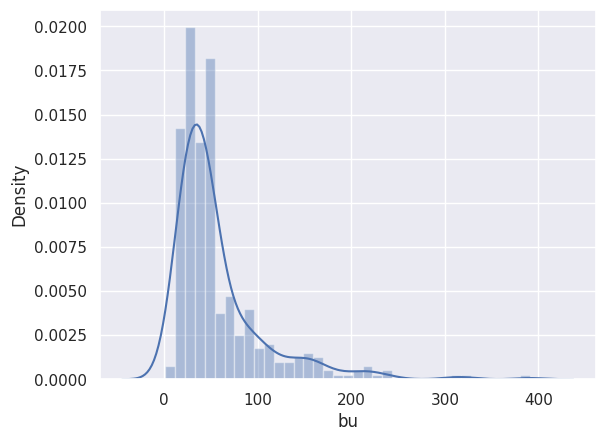

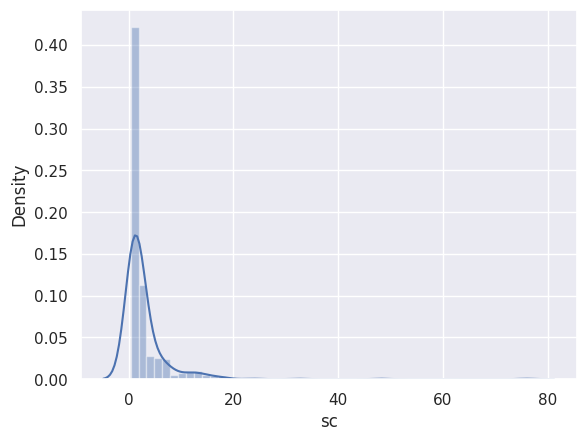

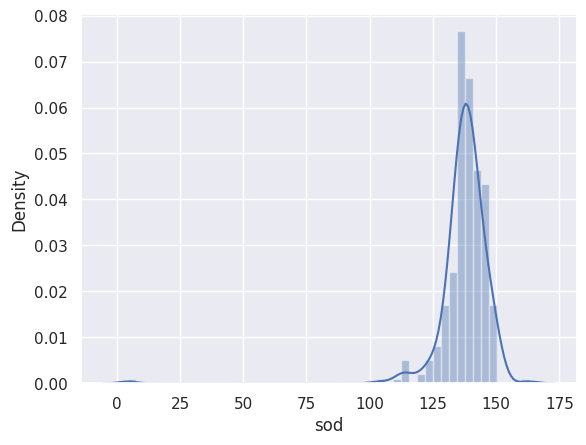

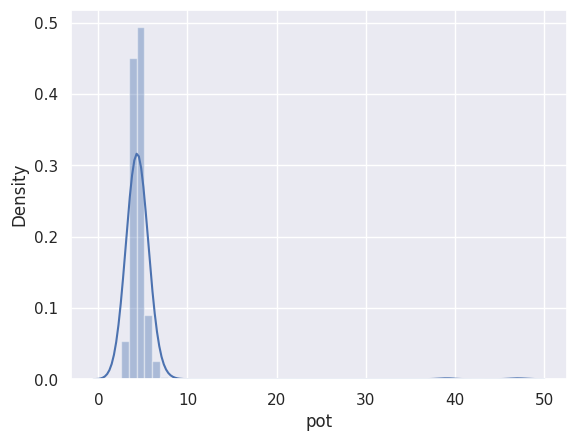

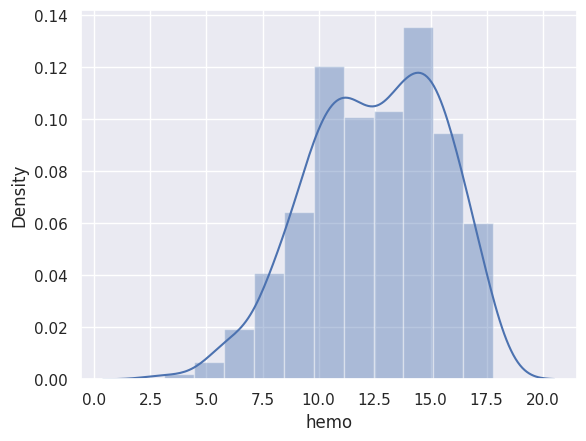

In [202]:
# Find the distribution of the data

def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=['object']).columns)[1:]:
    distplots(i)

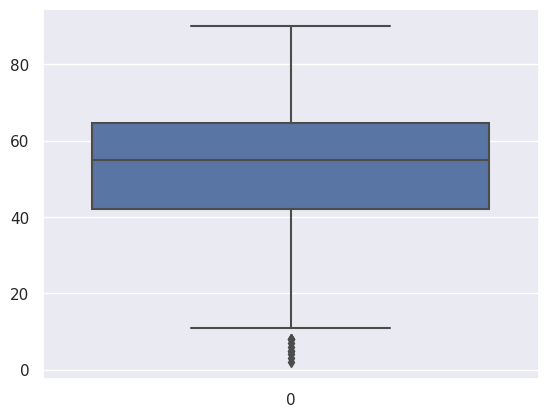

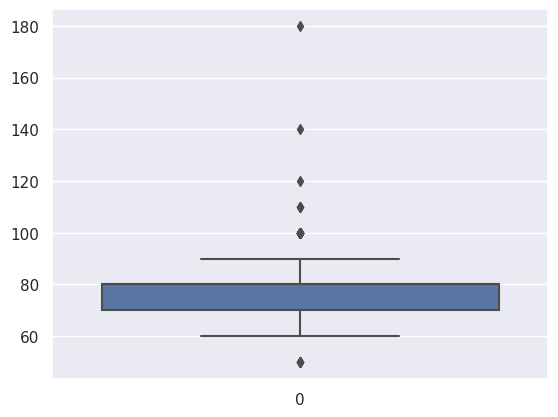

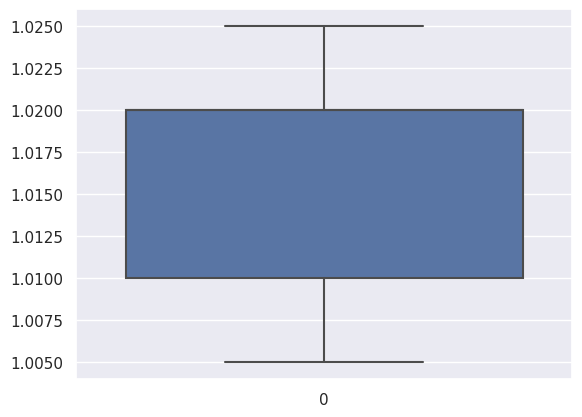

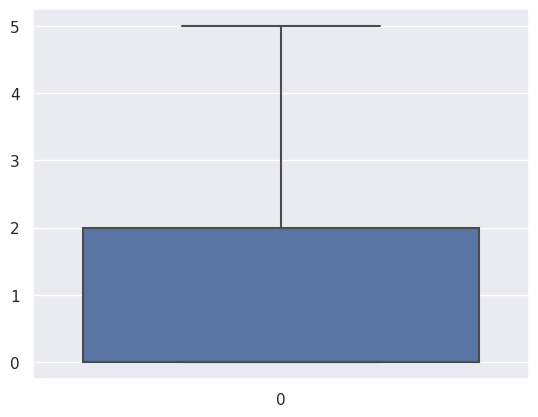

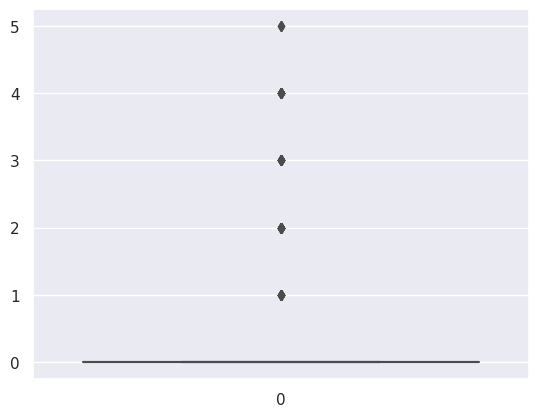

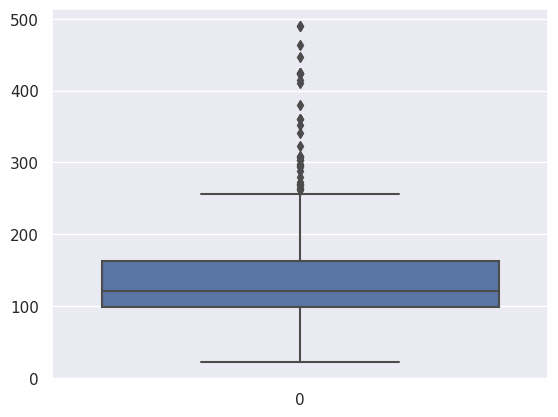

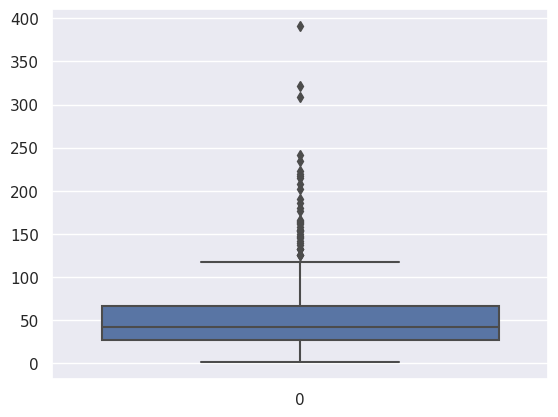

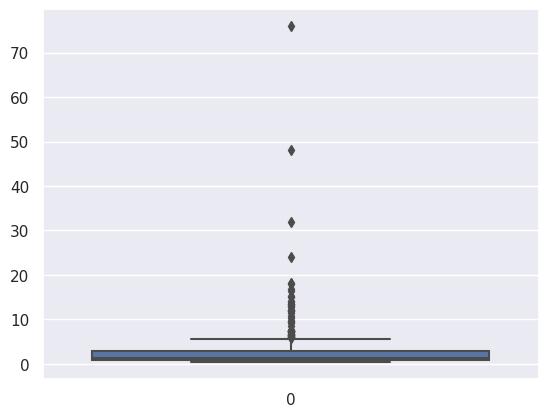

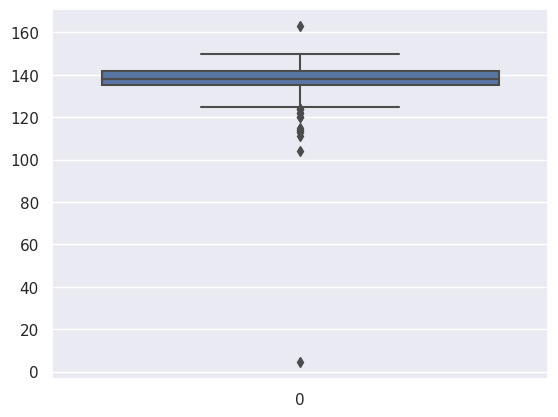

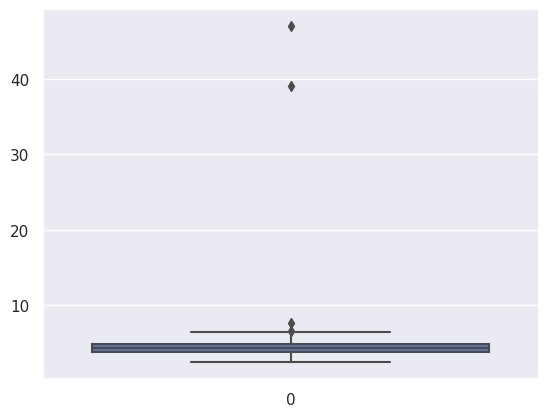

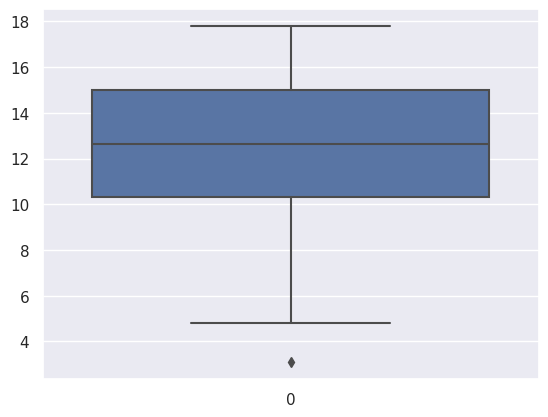

In [203]:
# Find and remove outliers of data

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)

In [204]:
df_imputed.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5.0,60.0,90.0,1.015,3.0,0.0,normal,normal,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6.0,68.0,70.0,1.010,0.0,0.0,normal,normal,notpresent,notpresent,...,36,9800,5.2,no,no,no,good,no,no,ckd
7,7.0,24.0,80.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8.0,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9.0,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [205]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

# Label Encoding:  To convert Categorical to Numerical

In [206]:
# Label encodint to convert categorical values to numerical 

from sklearn import preprocessing
"""
df_enco = df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco
"""

categorical_feature = [feature for feature in df_imputed.columns if df_imputed[feature].dtype == 'O']


In [207]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [208]:
df_imputed['pcv'] = df_imputed['pcv'].astype('float')
df_imputed['wc'] = df_imputed['wc'].astype('float')
df_imputed['rc'] = df_imputed['rc'].astype('float')

In [209]:
df_imputed.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [210]:
categorical_feature = [feature for feature in df_imputed.columns if df_imputed[feature].dtype == 'O']


In [211]:
categorical_feature

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [212]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

In [213]:
for i in df_imputed.select_dtypes(exclude=['float']).columns:
    df_imputed[i] = df_imputed[i].astype('category')
    df_imputed[i] = df_imputed[i].cat.codes

In [214]:
df_imputed.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1.0,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,2.0,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,3.0,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4.0,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


<Axes: >

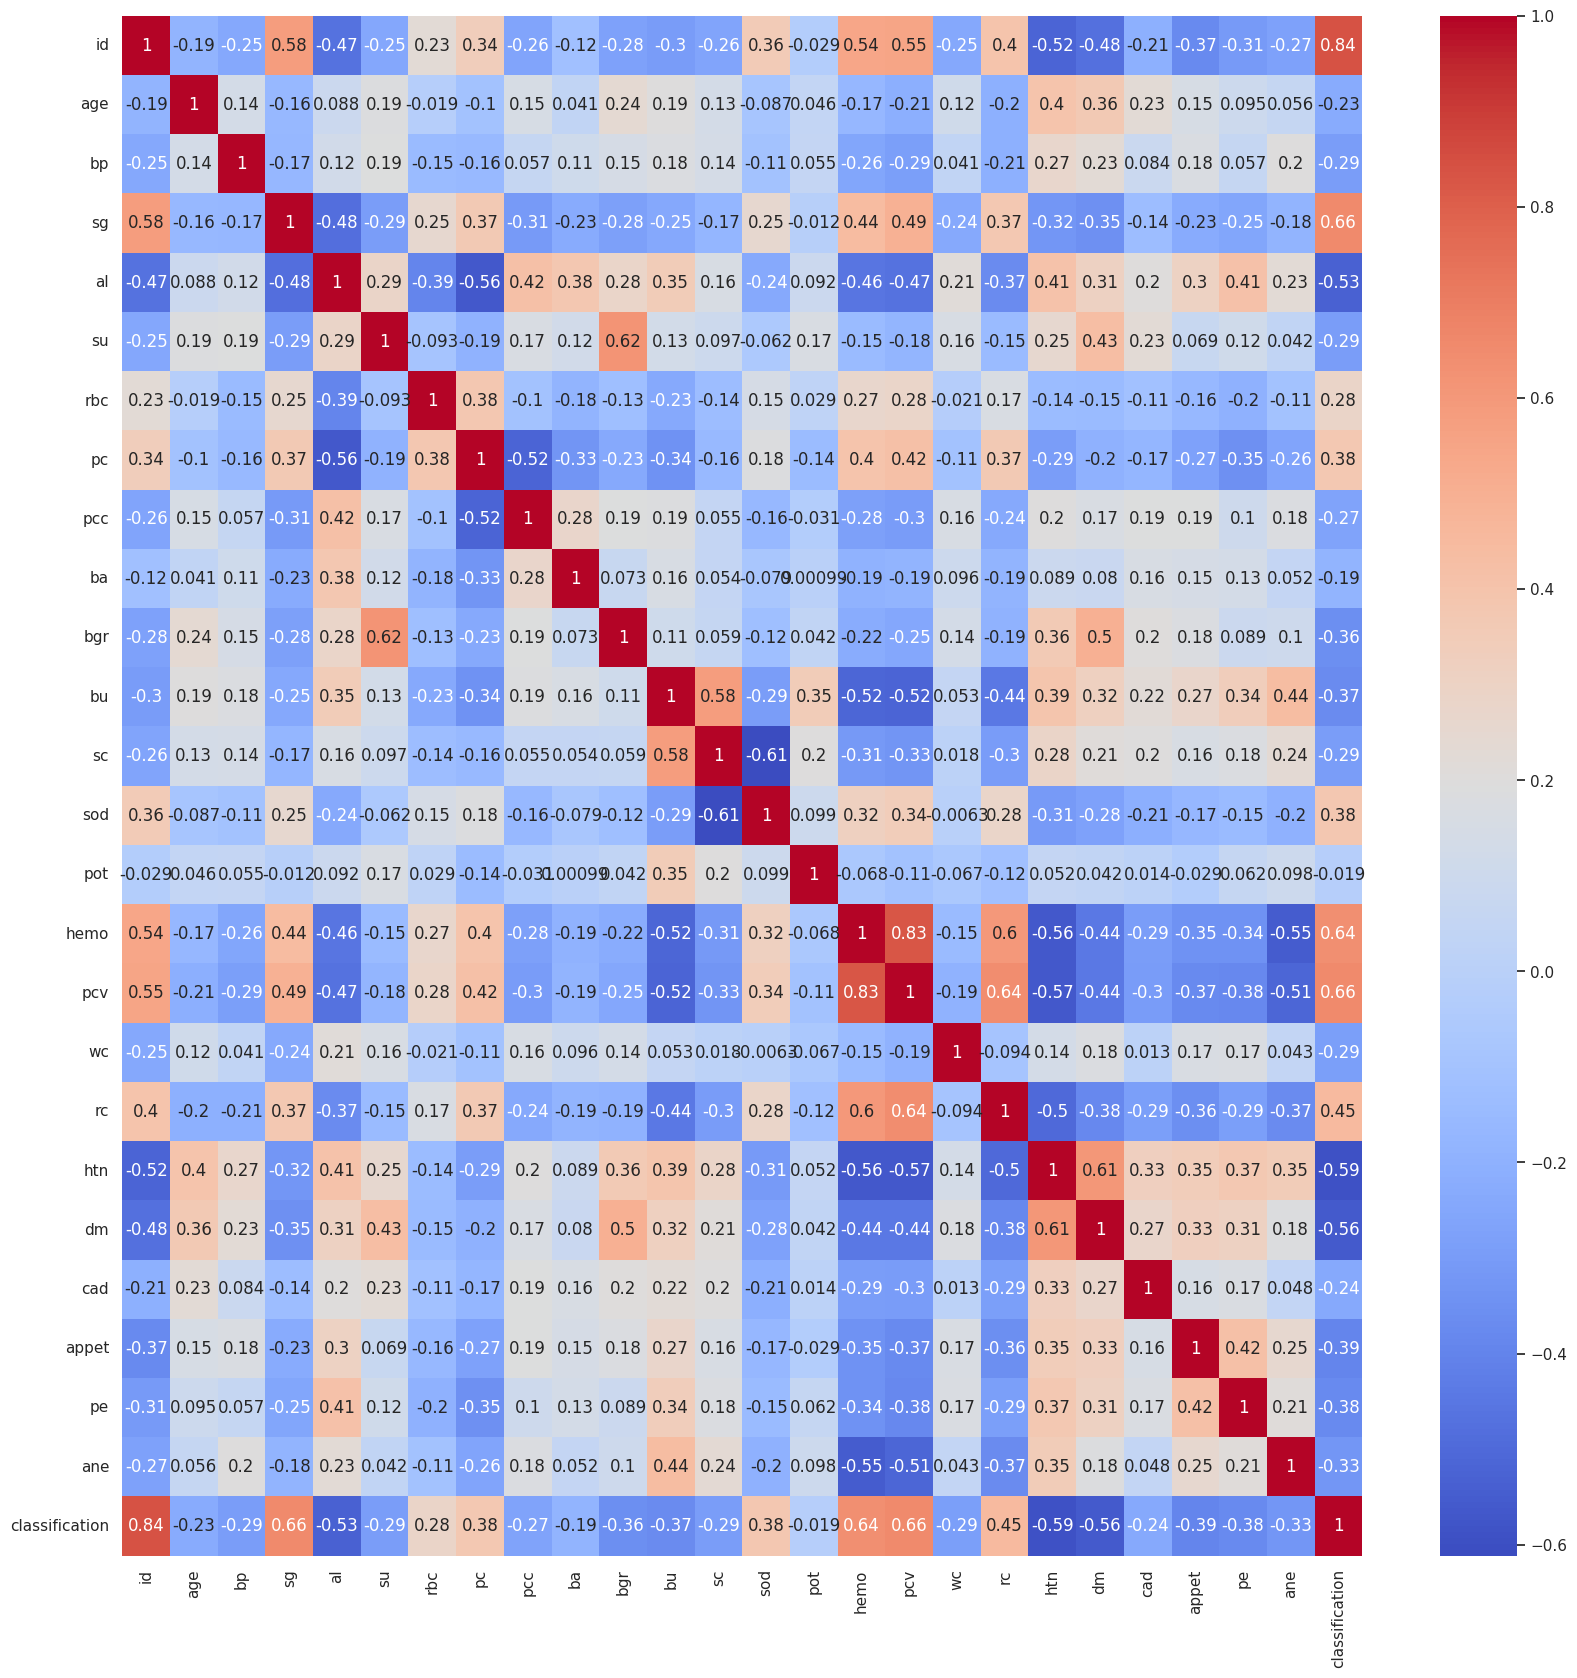

In [215]:
# Finding the correlation 

plt.figure(figsize=(20,20))
corr = df_imputed.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [216]:
df_imputed['classification'].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [217]:
# split the data into independent variable and dependent variable
x = df_imputed.drop(['id','classification'], axis=1)
y = df_imputed['classification']

In [218]:
x.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,...,11.3,38.0,6000.0,5.2,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,5.2,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


In [219]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int8

# Label Balancing with RandomOverSampler

In [220]:
# lets detect the label balance

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
print(Counter(y))

Counter({0: 250, 1: 150})


In [221]:
ros = RandomOverSampler()
x_ros , y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


# Feature Scaling using Standard Scaler

In [222]:
# feature scaling 
# Min Max Scaler (-1,1)
# from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x_ros)
y = y_ros

In [223]:
x

array([[ 0.04545455, -0.53846154,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.88636364, -1.        ,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.36363636, -0.53846154, -0.5       , ...,  1.        ,
        -1.        ,  1.        ],
       ...,
       [-0.54545455, -0.84615385,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.40909091, -0.84615385,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.40909091, -0.84615385,  0.5       , ..., -1.        ,
        -1.        , -1.        ]])

In [224]:
y

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    1
497    1
498    1
499    1
Name: classification, Length: 500, dtype: int8

# This is all about the pre-processing approach

In [225]:
x.shape

(500, 24)

In [226]:
# Applying PCA method to reduce non-significant variables and values (if any)

from sklearn.decomposition import PCA

# it means the machine(sklearn) choose the minimum number of PCA such that 95% of the variance is retained

pca = PCA(0.95)
x_pca = pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(500, 24)
(500, 15)


In [227]:
# split the data into training and test for building the model and prediction with test dataset

In [228]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=5)

# Model Building

# MLP - multilayer perceptron (Neural Network)

In [229]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model
from keras.optimizers import Adam

# creating the model

In [230]:
def model():
    classifier = Sequential()
    classifier.add(Dense(15, input_shape=(x_train.shape[1],),activation='relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(15, activation='relu'))
    classifier.add(Dropout(0.4))
    classifier.add(Dense(1, activation='sigmoid'))
    classifier.compile(optimizer ='adam', loss='binary_crossentropy',metrics =['accuracy'])
    
    return classifier
    

In [231]:
model = model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                240       
                                                                 
 dropout_4 (Dropout)         (None, 15)                0         
                                                                 
 dense_7 (Dense)             (None, 15)                240       
                                                                 
 dropout_5 (Dropout)         (None, 15)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 496
Trainable params: 496
Non-trainable params: 0
_________________________________________________________________


In [232]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, verbose=1)

Epoch 1/50
13/13 [==============================] - 1s 19ms/step - loss: 0.7562 - accuracy: 0.5475 - val_loss: 0.7037 - val_accuracy: 0.7300
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 0.7094 - accuracy: 0.6250 - val_loss: 0.6520 - val_accuracy: 0.8100
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6474 - accuracy: 0.7150 - val_loss: 0.6027 - val_accuracy: 0.8500
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 0.6090 - accuracy: 0.7500 - val_loss: 0.5546 - val_accuracy: 0.8700
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5738 - accuracy: 0.7800 - val_loss: 0.5094 - val_accuracy: 0.8800
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.5581 - accuracy: 0.7900 - val_loss: 0.4671 - val_accuracy: 0.9300
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.5114 - accuracy: 0.8325 - val_loss: 0.4255 - val_accuracy: 0.9200
Epoch 8/50
13/13 [=

In [233]:
y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)
y_pred

4/4 [==============================] - 0s 3ms/step


array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [

In [234]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [235]:
print(confusion_matrix(y_test, y_pred))

[[50  0]
 [ 0 50]]


In [236]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# Accuracy is 1 (100%)

In [237]:
print(accuracy_score(y_test, y_pred))

1.0


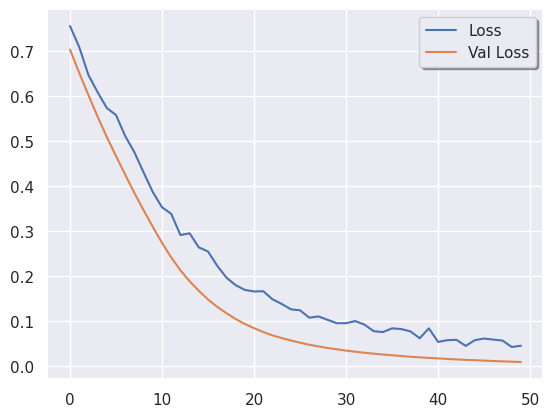

In [238]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(('Loss', 'Val Loss'),
           loc='upper right', shadow=True)

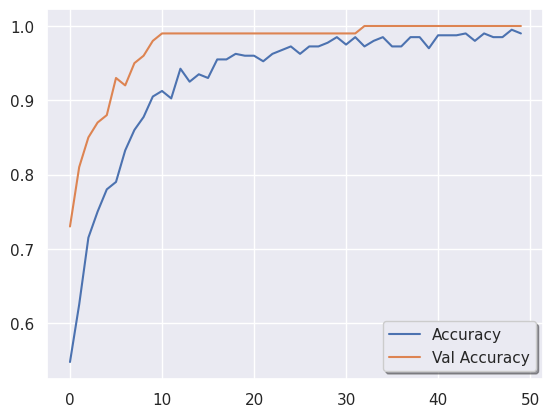

In [239]:
plt.plot(history.history['accuracy'], label='test')

plt.plot(history.history['val_accuracy'])
plt.legend(('Accuracy', 'Val Accuracy'),
           loc='lower right', shadow=True)